In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm           
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
df = pd.read_csv('datos_whales.csv')
df

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [26]:
df.drop(columns = ['Gender', 'Education', 'Country', 'Income_AUD', 'Max_wtp', 'wtp'], inplace = True)

In [27]:
df

,SeeWhales,Age,Income,AdultWhales,YoungWhales,PayConserve
0,1,31.0,65000.5,2,Yes,1
1,0,22.0,10000.0,6,No,0
2,0,46.0,85000.5,7,No,0
3,0,37.0,25000.5,4,Yes,1
4,0,66.0,NaN,6,No,0
...,...,...,...,...,...,...
696,0,56.0,10000.0,0,Yes,1
697,0,38.0,35000.5,6,Yes,1
698,0,24.0,25000.5,6,No,1
699,0,50.0,35000.5,2,Yes,1


In [32]:
df.replace({'YoungWhales': {'Yes': 1, 'No': 0}}, inplace = True)
df

,SeeWhales,Age,Income,AdultWhales,YoungWhales,PayConserve
0,1,31.0,65000.5,2,1,1
1,0,22.0,10000.0,6,0,0
2,0,46.0,85000.5,7,0,0
3,0,37.0,25000.5,4,1,1
4,0,66.0,NaN,6,0,0
...,...,...,...,...,...,...
696,0,56.0,10000.0,0,1,1
697,0,38.0,35000.5,6,1,1
698,0,24.0,25000.5,6,0,1
699,0,50.0,35000.5,2,1,1


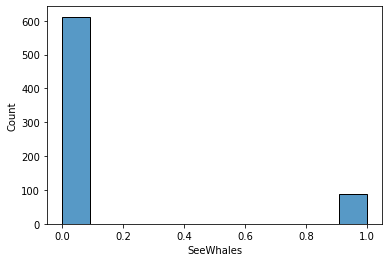

In [33]:
sns.histplot(data = df, x = 'SeeWhales')

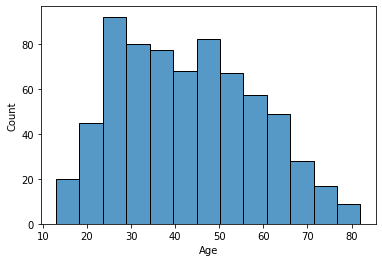

In [34]:
sns.histplot(data = df, x = 'Age')

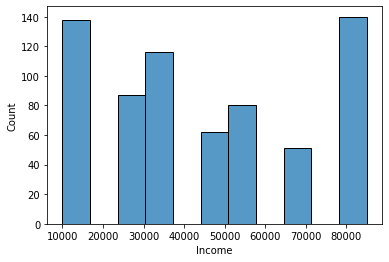

In [35]:
sns.histplot(data = df, x = 'Income')

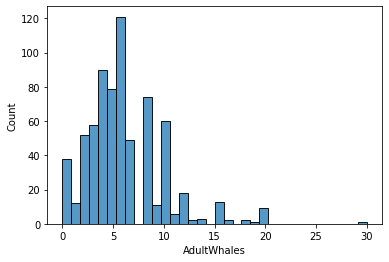

In [37]:
sns.histplot(data = df, x = 'AdultWhales')

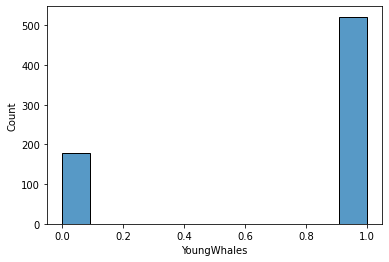

In [38]:
sns.histplot(data = df, x = 'YoungWhales')

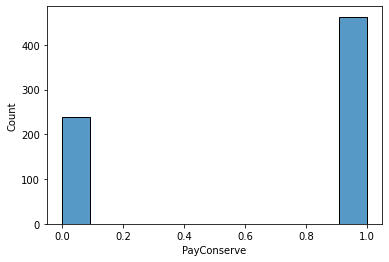

In [39]:
sns.histplot(data = df, x = 'PayConserve')

In [40]:
df.describe()

,SeeWhales,Age,Income,AdultWhales,YoungWhales,PayConserve
count,701.000000,691.000000,674.000000,701.000000,701.000000,701.000000
mean,0.126961,42.918958,44540.456973,6.058488,0.744650,0.660485
std,0.333168,15.562472,26362.209685,3.779758,0.436369,0.473883
min,0.000000,13.000000,10000.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,25000.500000,4.000000,0.000000,0.000000
50%,0.000000,41.000000,35000.500000,6.000000,1.000000,1.000000
75%,0.000000,54.500000,65000.500000,8.000000,1.000000,1.000000
max,1.000000,82.000000,85000.500000,30.000000,1.000000,1.000000


In [41]:
df.mean()

SeeWhales          0.126961
Age               42.918958
Income         44540.456973
AdultWhales        6.058488
YoungWhales        0.744650
PayConserve        0.660485
dtype: float64

In [46]:
df.dropna(inplace = True)
df

,SeeWhales,Age,Income,AdultWhales,YoungWhales,PayConserve
0,1,31.0,65000.5,2,1,1
1,0,22.0,10000.0,6,0,0
2,0,46.0,85000.5,7,0,0
3,0,37.0,25000.5,4,1,1
5,0,65.0,45000.5,3,1,1
...,...,...,...,...,...,...
696,0,56.0,10000.0,0,1,1
697,0,38.0,35000.5,6,1,1
698,0,24.0,25000.5,6,0,1
699,0,50.0,35000.5,2,1,1


In [52]:
y = df['PayConserve']
x = df[['SeeWhales','Age','Income', 'AdultWhales', 'YoungWhales']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
reg= model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PayConserve   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.026
Date:                Thu, 19 May 2022   Prob (F-statistic):             0.0104
Time:                        22:14:08   Log-Likelihood:                -436.68
No. Observations:                 668   AIC:                             885.4
Df Residuals:                     662   BIC:                             912.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7895      0.073     10.864      0.000       0.647       0.932
SeeWhales       0.1293      0.055      2.364      0.018       0.022       0.237
Age            -0.0037      0.001     -3.109      0.002      -0.006      -0.001
Income      -5.575e-07   6.99e-07     -0.798      0.425   -1.93e-06    8.15e-07
AdultWhales     0.0060      0.005      1.225      0.221      -0.004       0.015
YoungWhales     0.0148      0.042      0.354      0.724      -0.067       0.097
==============================================================================
Omnibus:                     9465.928   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.818
Skew:                          -0.695   Prob(JB):                     1.42e-24
Kurtosis:                       1.582   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
reg.params['SeeWhales']

0.12928189982098354

Ver ballenas, aumenta la probabilidad en un 12,92% de que las personas esten dispuestas a pagar por conservarlas.

In [54]:
reg.params['Age']

-0.003715909767284215

La edad disminuye la probabilidad en un 0,3% la disposición a pagar de las personas por conservar las ballenas


In [55]:
y = df['PayConserve']
x = df[['SeeWhales','Age']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
reg= model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PayConserve   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.541
Date:                Thu, 19 May 2022   Prob (F-statistic):            0.00154
Time:                        22:20:52   Log-Likelihood:                -437.72
No. Observations:                 668   AIC:                             881.4
Df Residuals:                     665   BIC:                             895.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8014      0.053     15.021      0.000       0.697       0.906
SeeWhales      0.1341      0.054      2.463      0.014       0.027       0.241
Age           -0.0035      0.001     -2.951      0.003      -0.006      -0.001
==============================================================================
Omnibus:                     8390.096   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.924
Skew:                          -0.698   Prob(JB):                     8.19e-25
Kurtosis:                       1.572   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
reg.params['Age']

-0.003491032644243685

In [57]:
reg.params['SeeWhales']

0.13405884169521864

Se puede concluir que, la edad disminuye la disposición a pagar por conservar las ballenas de las personas, en aproximadamente un 0,3%; esto implica que las personas jóvenes están mucho más dipuestas a pagar por la conservación de las ballenas. Cabe mencionar que el hecho de ver ballenas aumenta considerablemente la disposición de las personas a pagar por conservar las ballenas, en aproximadamente un 13,40%
